# 0. Read Score

In [1]:
import xml.etree.cElementTree as ET

filename = "../../XMLs/至少還有你_主旋律.musicxml"
#filename = "../../XMLs/jinglebells.xml"
tree = ET.parse(filename)
root = tree.getroot()
root.tag, root.attrib

('score-partwise', {'version': '3.1'})

music21: Certain music21 functions might need the optional package scipy;
                  if you run into errors, install it by following the instructions at
                  http://mit.edu/music21/doc/installing/installAdditional.html


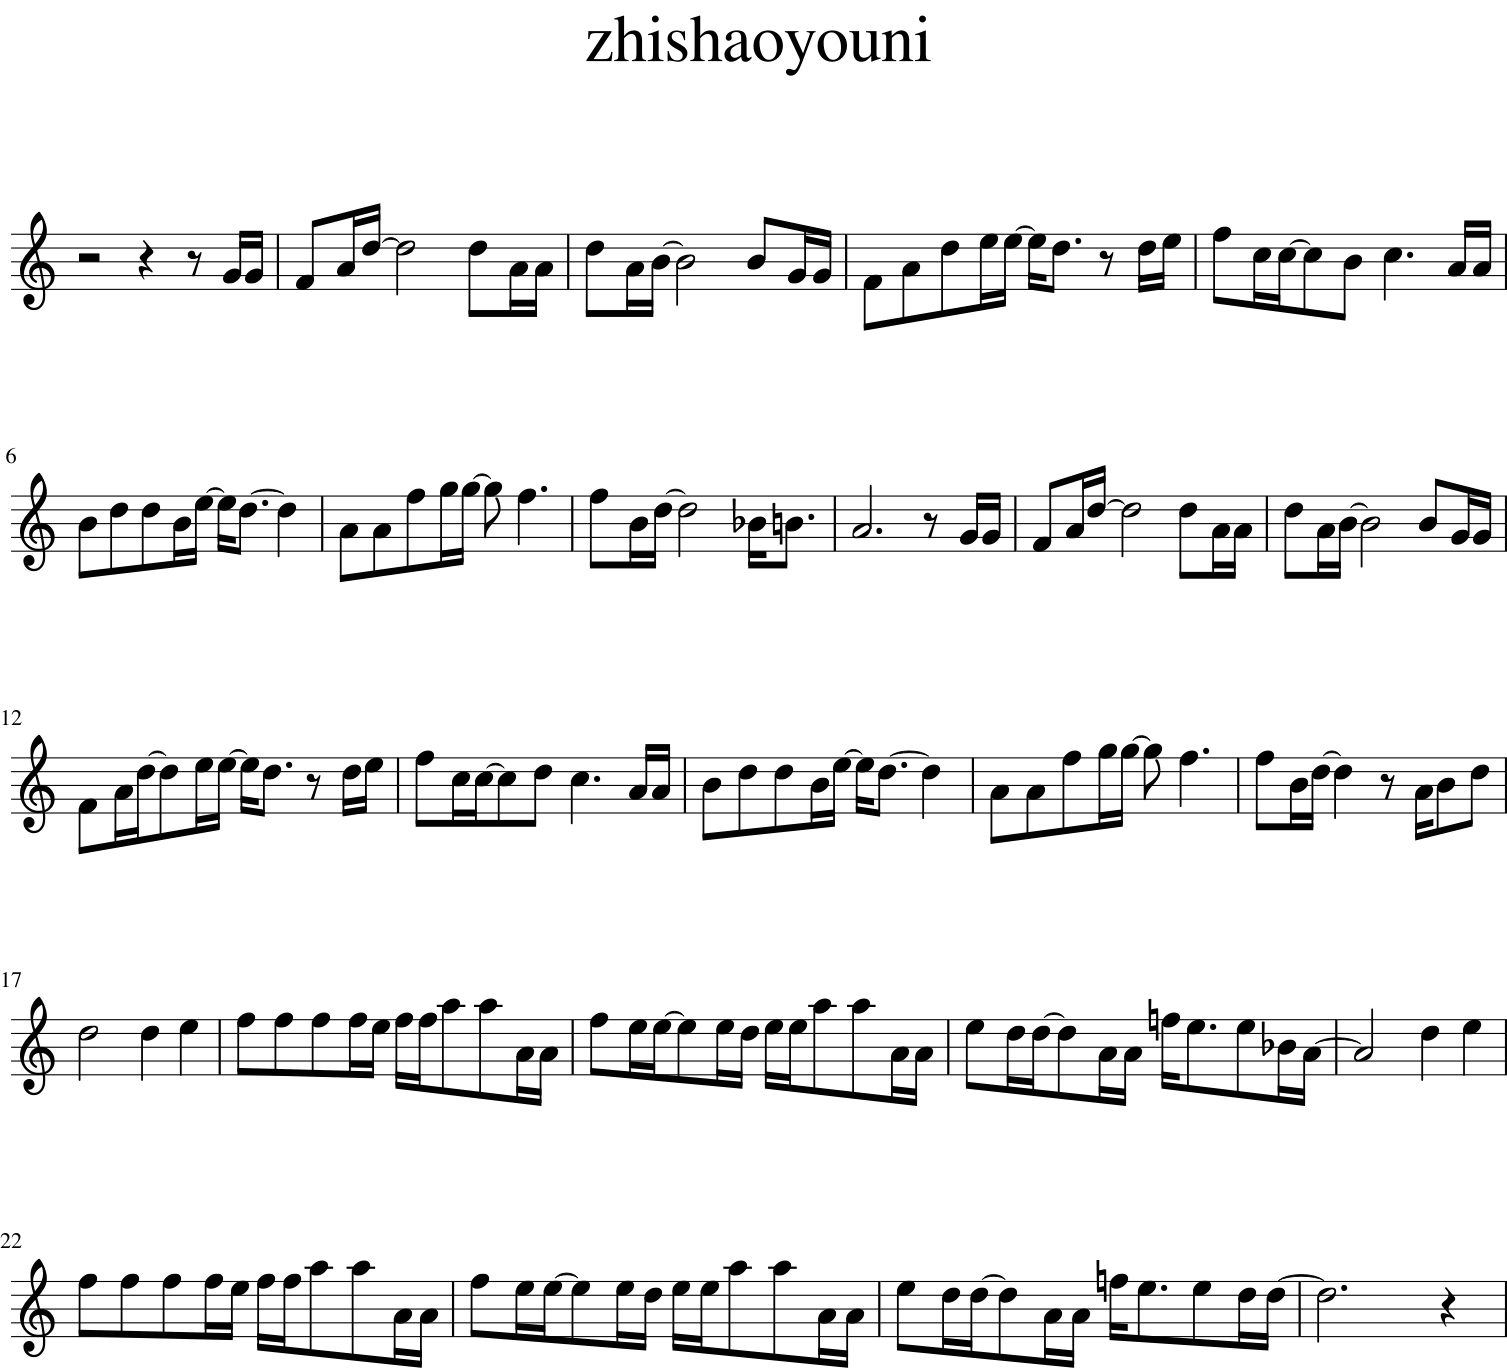

In [2]:
from mxlParsing import *

xml_measures = root.findall('.//measure')
measures = []

for xml_measure in xml_measures:
    measure = Measure(get_meas_notes_xml(xml_measure))
    if not measure.get_sos()==['0']:
        measures.append(measure)
        
#make parts
m21Part_main = measures_to_m21Part(measures)

#get time signature
top,bottom = get_ts_xml(root)
ts = m21.meter.TimeSignature(str(top)+'/'+str(bottom))

#build
score = build_m21Score_1p(m21Part_main,'zhishaoyouni', ts)
score.show()

# 1. Mess around